## predictive_maintenance

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.ensemble import RandomForestClassifier

In [265]:
df = pd.read_csv('C:/Users/abu_s/Desktop/Data/Json/MPMS/predictive_maintenance.csv')

In [266]:
df.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure


In [267]:
# Drop unnecessary columns
df = df.drop(["UDI", "Product ID"], axis=1)

In [268]:
# Convert temperature from Kelvin to Celsius
df["Air temperature [°C]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [°C]"] = df["Process temperature [K]"] - 272.15
        
# Create a new column for the temperature difference
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
        
# Drop original temperature columns in Kelvin
df = df.drop(columns=["Air temperature [K]", "Process temperature [K]"])

In [269]:
print("Shape of the DataFrame:", df.shape)
print("Size of the DataFrame:", df.size)

Shape of the DataFrame: (10000, 9)
Size of the DataFrame: 90000


In [270]:
print("DataFrame Info:\n")
df.info()

DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Rotational speed [rpm]       10000 non-null  int64  
 2   Torque [Nm]                  10000 non-null  float64
 3   Tool wear [min]              10000 non-null  int64  
 4   Target                       10000 non-null  int64  
 5   Failure Type                 10000 non-null  object 
 6   Air temperature [°C]         10000 non-null  float64
 7   Process temperature [°C]     10000 non-null  float64
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.3+ KB


In [271]:
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Air temperature [°C],Process temperature [°C],Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1538.776100,39.986910,107.951000,0.033900,27.854930,37.855560,10.000630
std,179.284096,9.968934,63.654147,0.180981,2.000259,1.483734,1.001094
min,1168.000000,3.800000,0.000000,0.000000,23.150000,33.550000,7.600000
25%,1423.000000,33.200000,53.000000,0.000000,26.150000,36.650000,9.300000
50%,1503.000000,40.100000,108.000000,0.000000,27.950000,37.950000,9.800000
75%,1612.000000,46.800000,162.000000,0.000000,29.350000,38.950000,11.000000
max,2886.000000,76.600000,253.000000,1.000000,32.350000,41.650000,12.100000


In [272]:
df.isna().sum()

Type                           0
Rotational speed [rpm]         0
Torque [Nm]                    0
Tool wear [min]                0
Target                         0
Failure Type                   0
Air temperature [°C]           0
Process temperature [°C]       0
Temperature difference [°C]    0
dtype: int64

# EDA

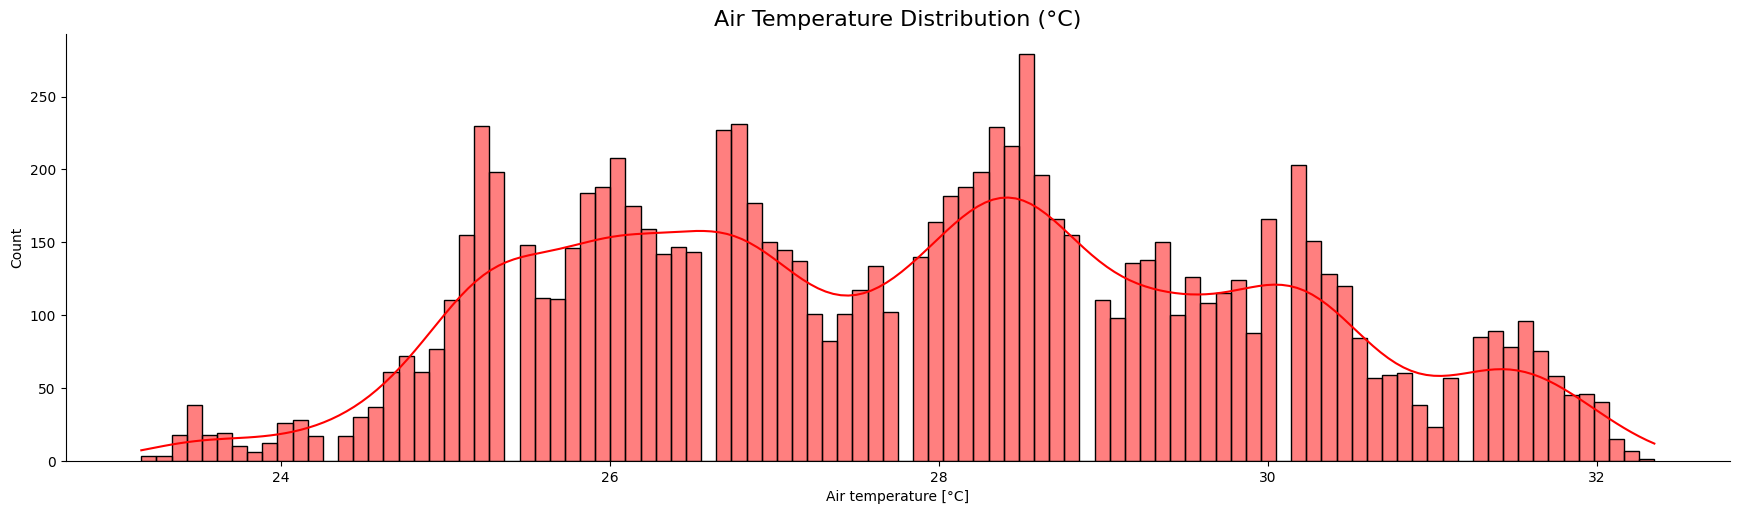

In [274]:
# Air temperature distribution plot with KDE
sns.displot(df, x="Air temperature [°C]", kde=True, bins=100, color="red", aspect=3.5, height=5)
plt.title("Air Temperature Distribution (°C)", fontsize=16)
plt.show()

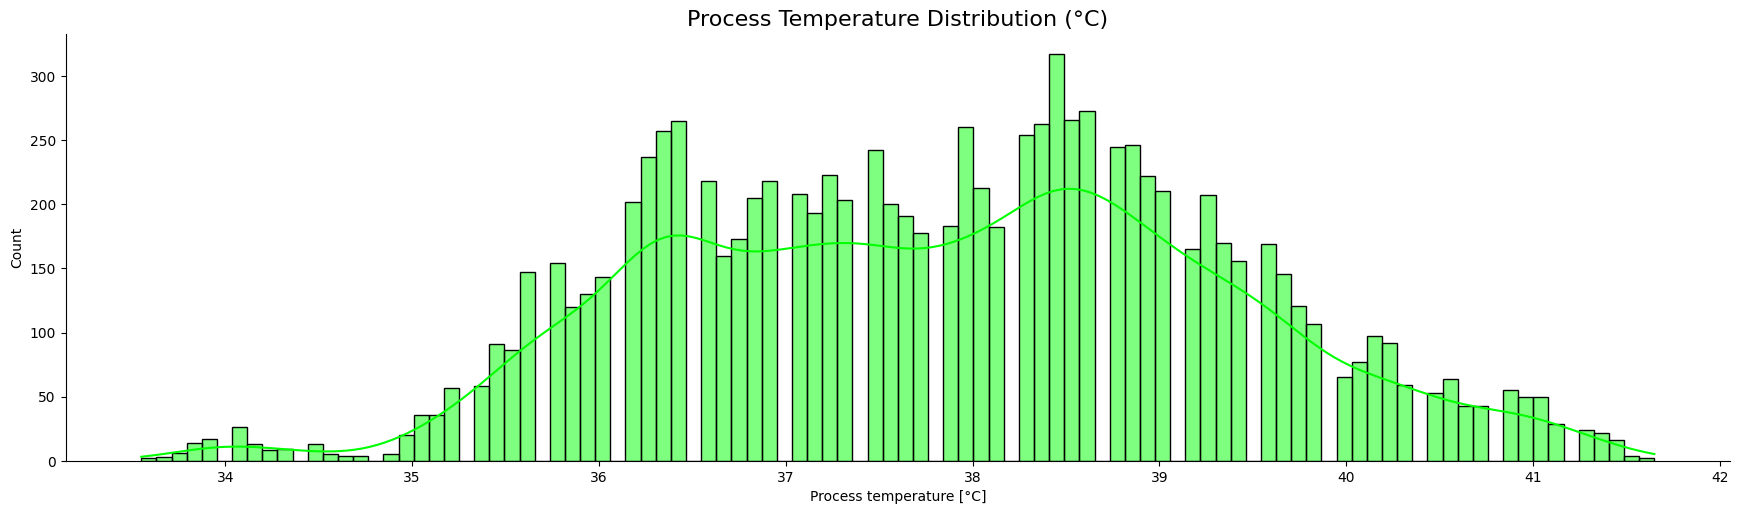

In [275]:
# Process temperature distribution plot with KDE
sns.displot(df, x="Process temperature [°C]", kde=True, bins=100, color="lime", aspect=3.5, height=5)
plt.title("Process Temperature Distribution (°C)", fontsize=16)
plt.show()

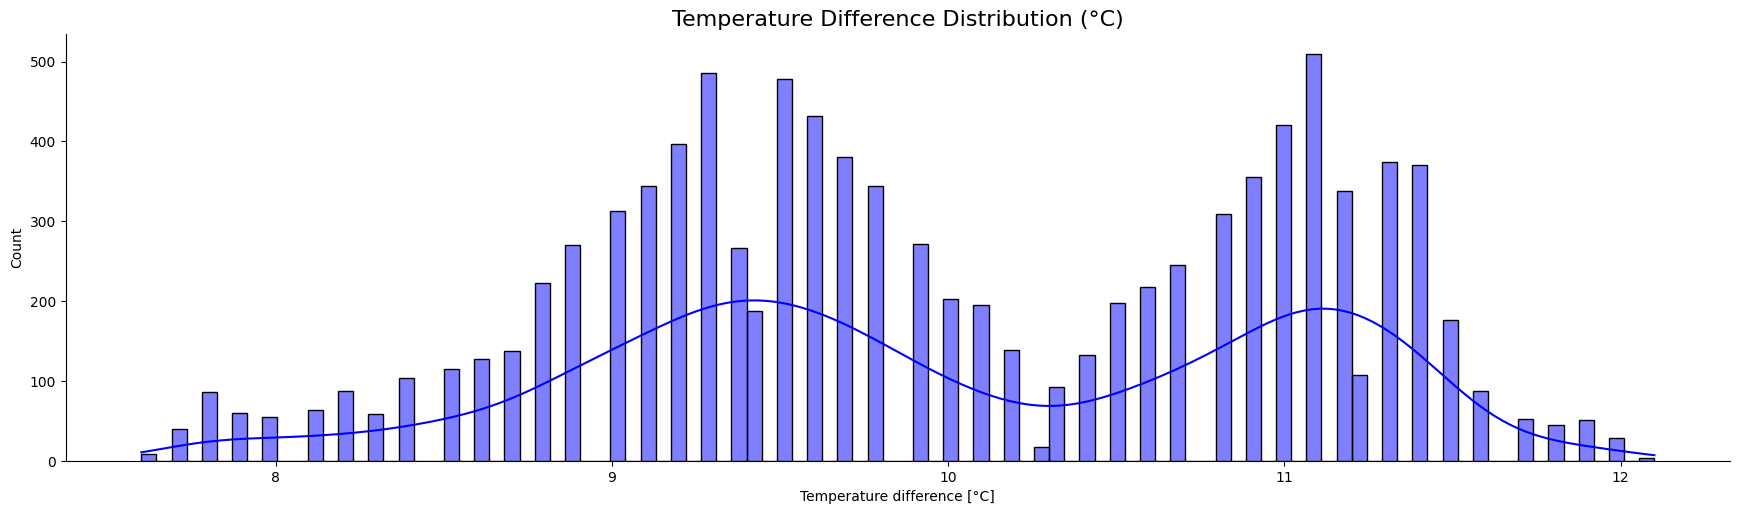

In [276]:
# Temperature difference distribution plot with KDE
sns.displot(df, x="Temperature difference [°C]", kde=True, bins=100, color="blue", aspect=3.5, height=5)
plt.title("Temperature Difference Distribution (°C)", fontsize=16)
plt.show()

## Values counts

In [278]:
# Print value counts for categorical columns
for col in ['Type', 'Target', 'Failure Type']:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("****" * 8)

Value counts for Type:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
********************************
Value counts for Target:
Target
0    9661
1     339
Name: count, dtype: int64
********************************
Value counts for Failure Type:
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
********************************


## Countplot + pie

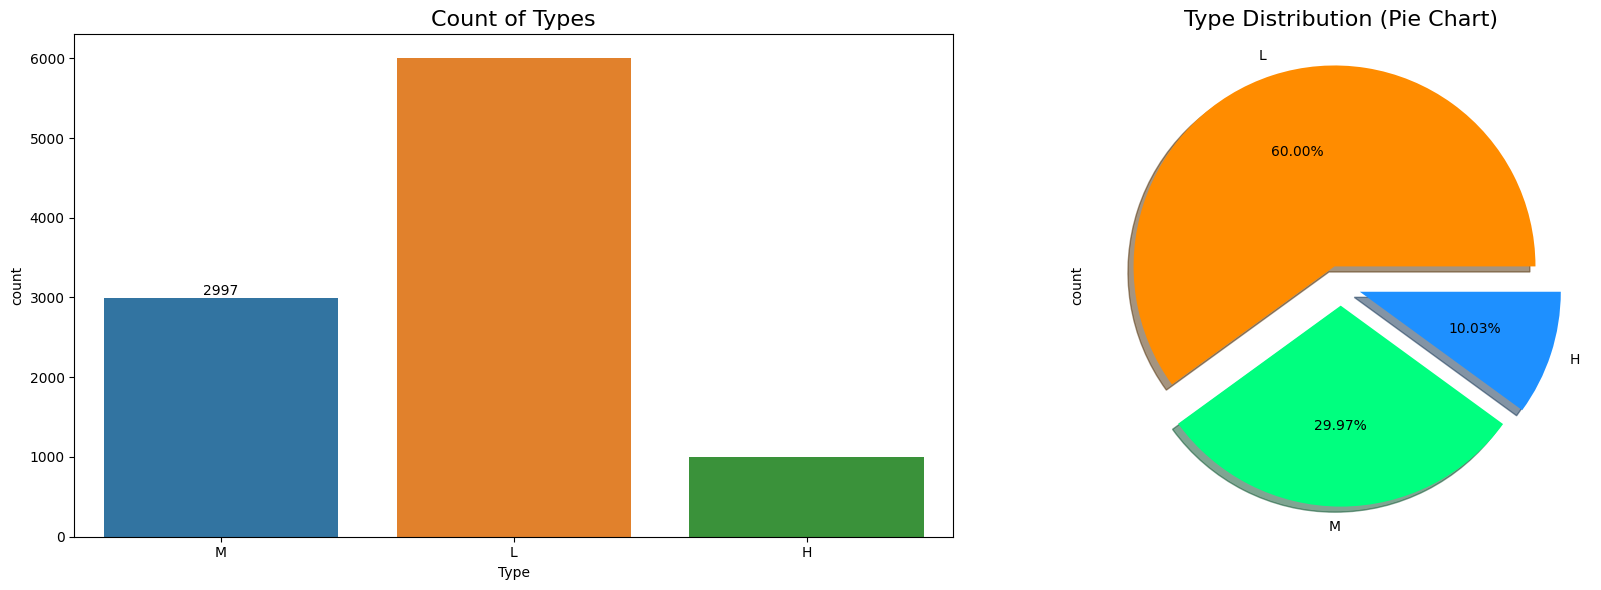

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Countplot with corrected hue usage
sns.countplot(x='Type', hue='Type', data=df, ax=axes[0], palette="tab10", legend=False)
axes[0].set_title("Count of Types", fontsize=16)

# Add bar labels (optional: check if containers exist)
try:
    axes[0].bar_label(axes[0].containers[0])
except AttributeError:
    print("bar_label is not supported in this version of matplotlib.")

# Pie chart
df['Type'].value_counts().plot.pie(
    explode=[0.1] * df['Type'].nunique(),
    autopct='%1.2f%%',
    shadow=True,
    ax=axes[1],
    colors=["#FF8C00", "#00FF7F", "#1E90FF"]
)
axes[1].set_title("Type Distribution (Pie Chart)", fontsize=16)

plt.tight_layout()
plt.show()


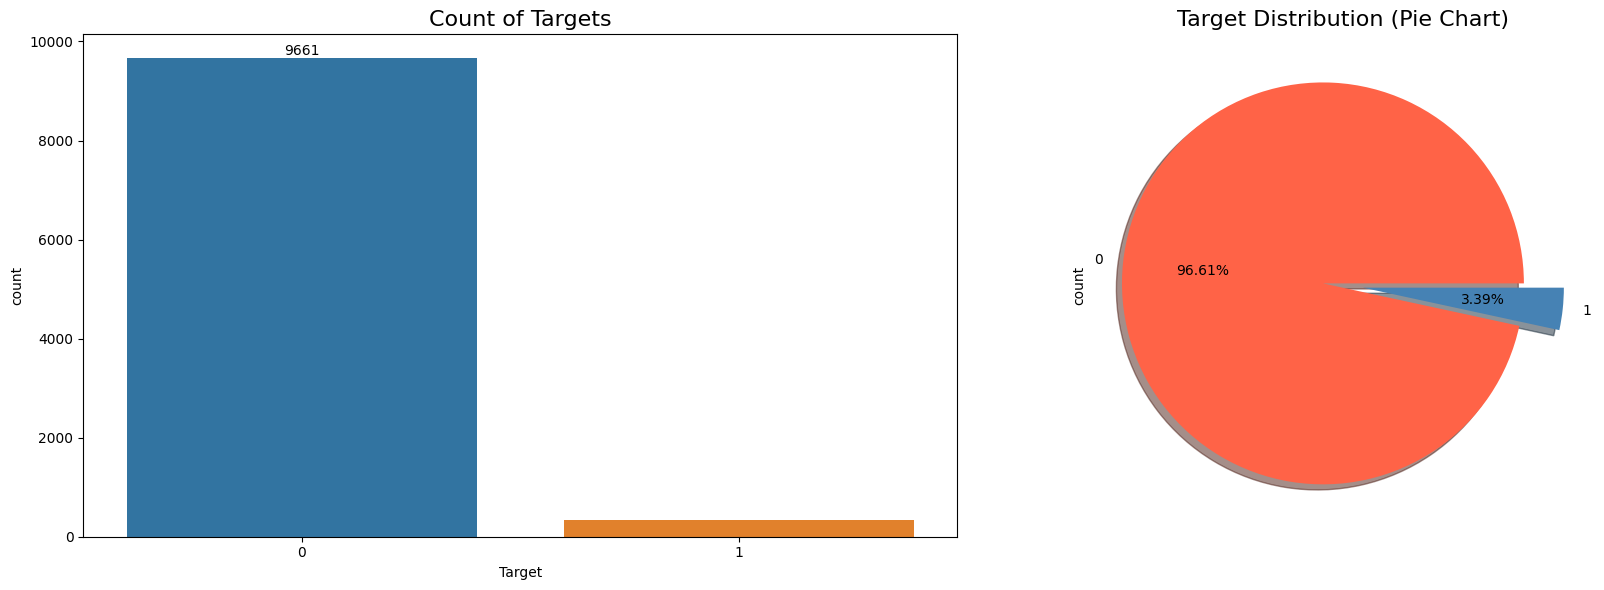

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Updated countplot
sns.countplot(x='Target', hue='Target', data=df, ax=axes[0], palette="tab10", legend=False)
axes[0].set_title("Count of Targets", fontsize=16)

# Add bar labels
try:
    axes[0].bar_label(axes[0].containers[0])
except AttributeError:
    print("bar_label is not supported in this version of matplotlib.")

# Pie chart for 'Target'
df['Target'].value_counts().plot.pie(
    explode=[0.1] * df['Target'].nunique(),
    autopct='%1.2f%%',
    shadow=True,
    ax=axes[1],
    colors=["#FF6347", "#4682B4"]
)
axes[1].set_title("Target Distribution (Pie Chart)", fontsize=16)

plt.tight_layout()
plt.show()


## PairPlot

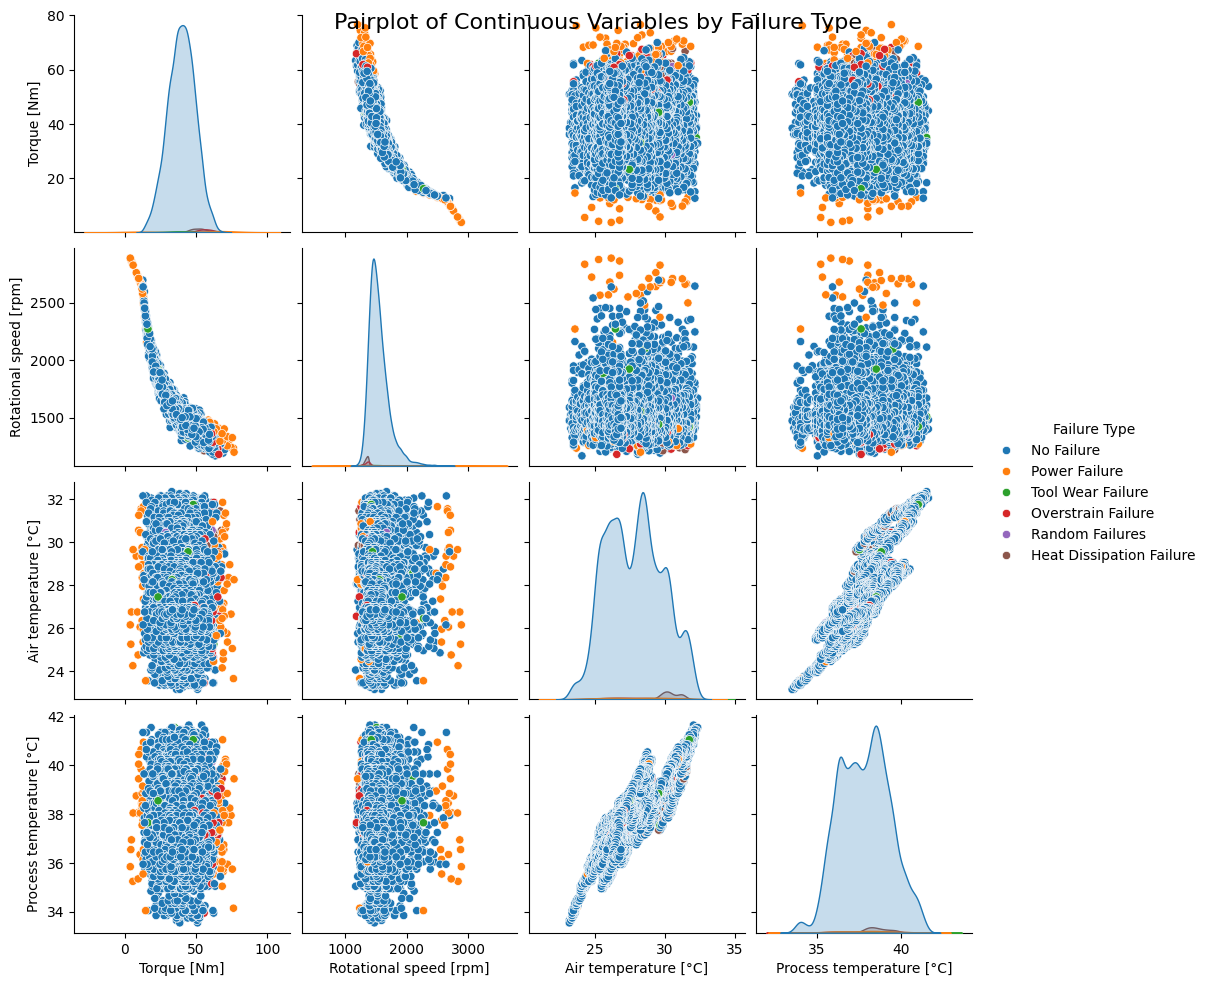

In [283]:
# Pairplot to explore relationships between features
sns.pairplot(df, vars=["Torque [Nm]", "Rotational speed [rpm]", "Air temperature [°C]", "Process temperature [°C]"], hue="Failure Type", palette="tab10", height=2.5)
plt.suptitle("Pairplot of Continuous Variables by Failure Type", fontsize=16)
plt.show()

## Scatter plot

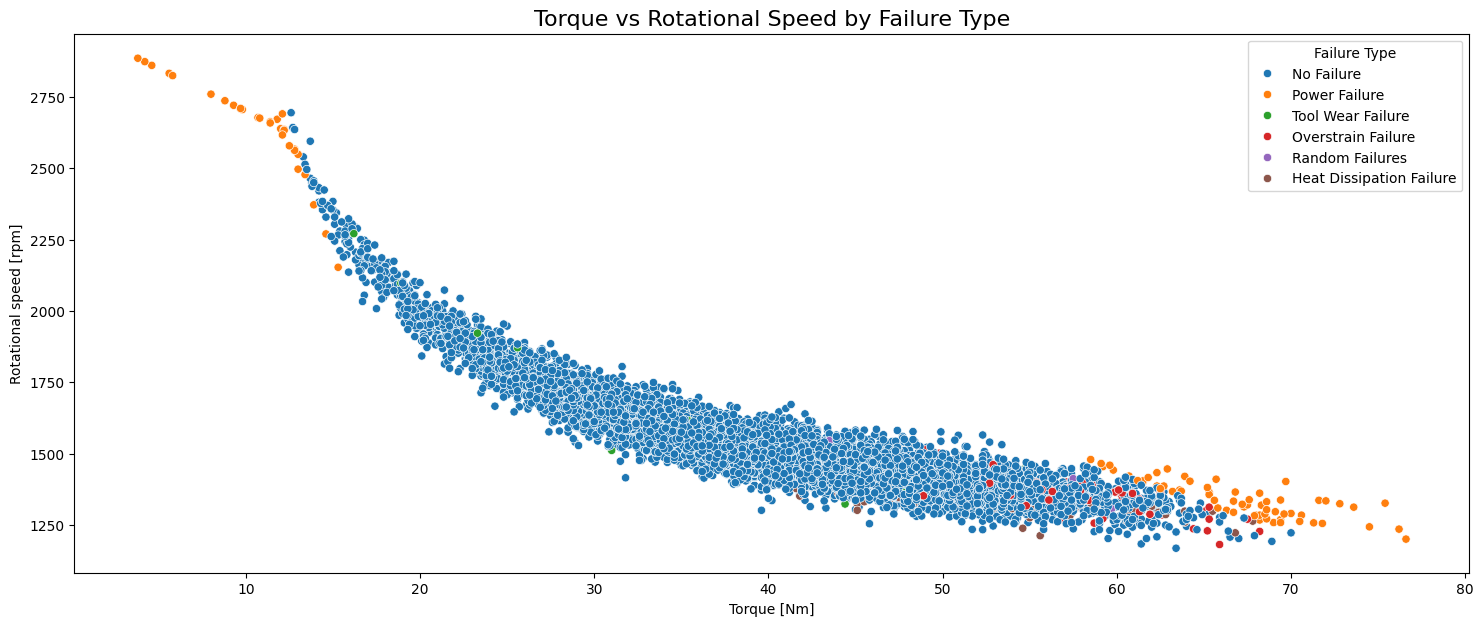

In [285]:
# Scatter plot: Torque vs Rotational Speed with 'Failure Type' as hue
plt.figure(figsize=(18, 7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", palette="tab10")
plt.title("Torque vs Rotational Speed by Failure Type", fontsize=16)
plt.show()

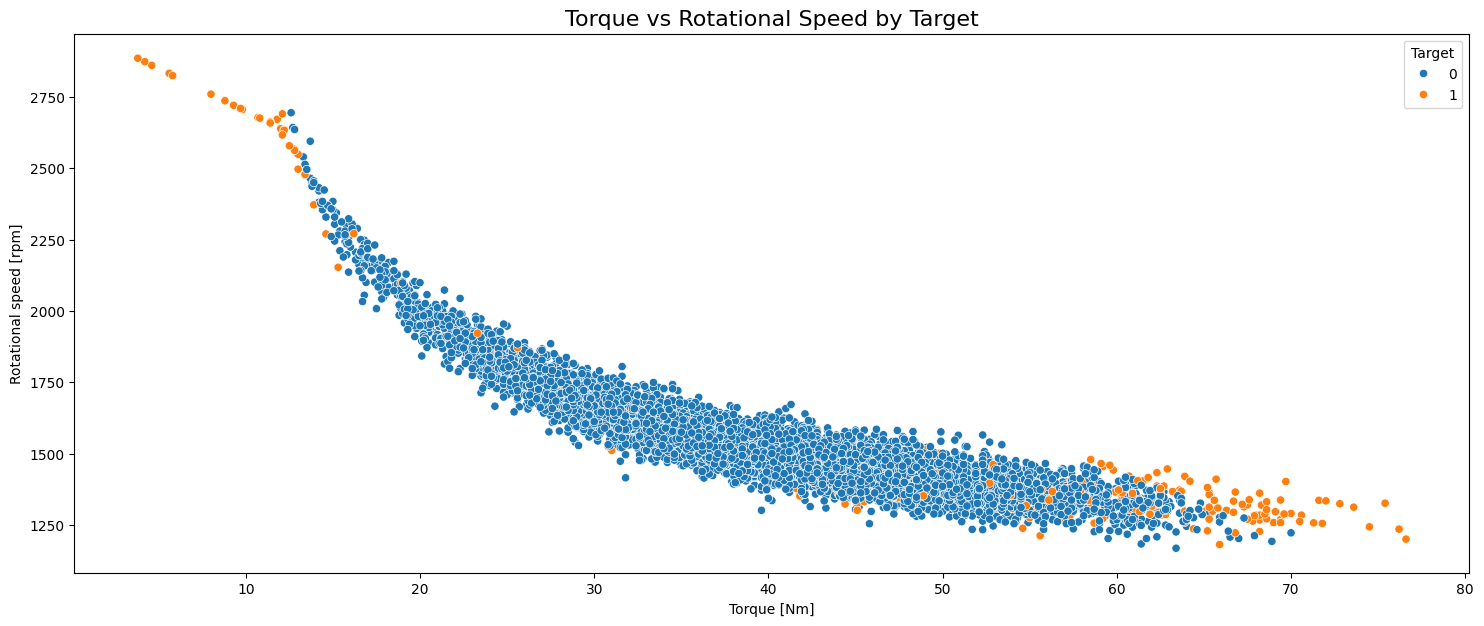

In [286]:
# Scatter plot: Torque vs Rotational Speed with 'Target' as hue
plt.figure(figsize=(18, 7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target", palette="tab10")
plt.title("Torque vs Rotational Speed by Target", fontsize=16)
plt.show()

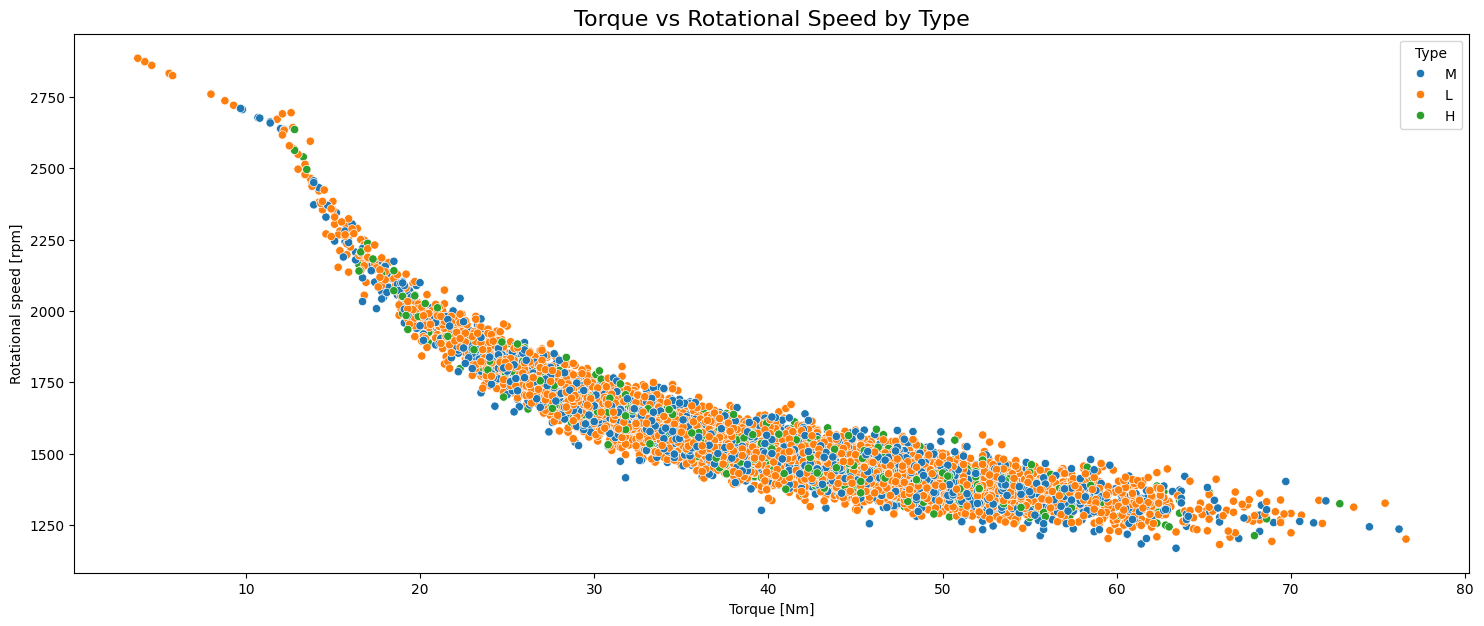

In [287]:
# Scatter plot: Torque vs Rotational Speed with 'Type' as hue
plt.figure(figsize=(18, 7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type", palette="tab10")
plt.title("Torque vs Rotational Speed by Type", fontsize=16)
plt.show()

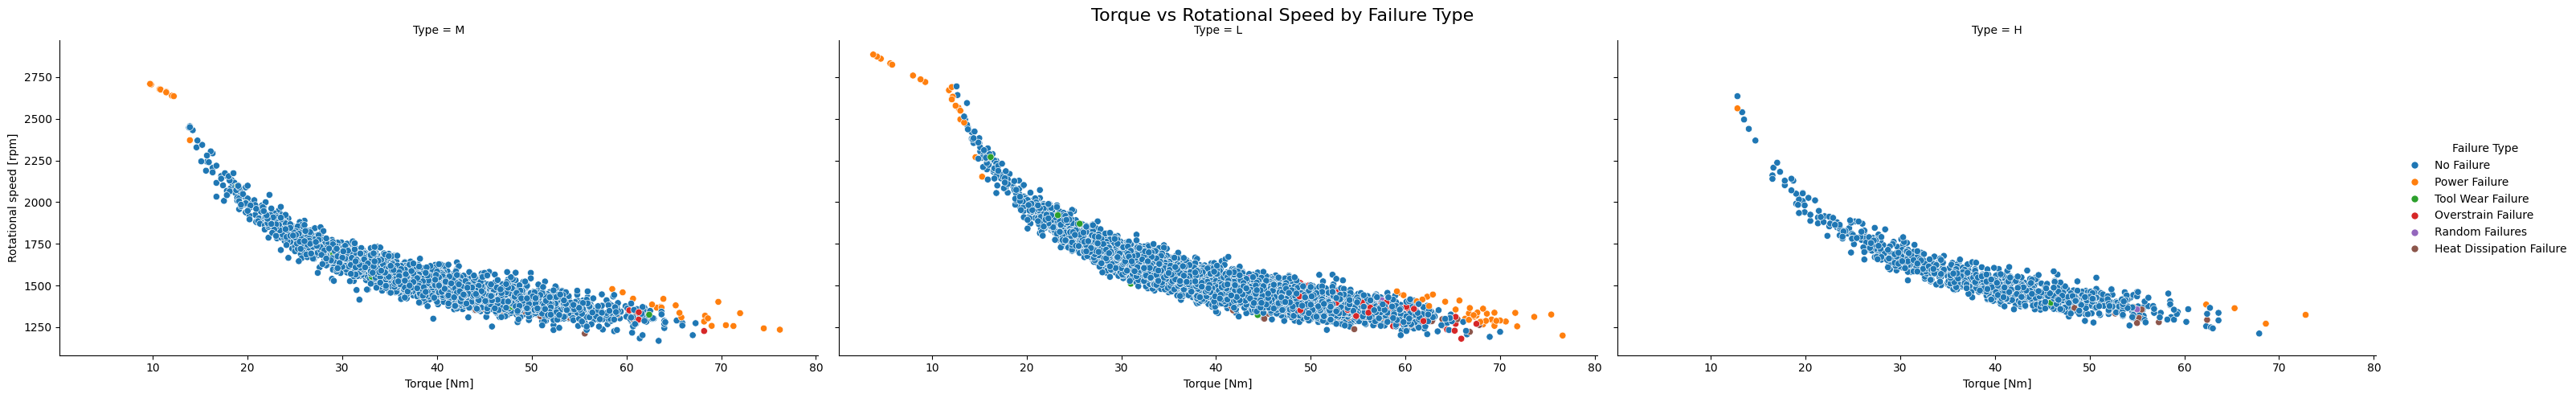

In [288]:
# Relplot with hue by 'Failure Type'
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", col="Type", palette='tab10', height=5, aspect=2)
plt.subplots_adjust(top=0.9)
plt.suptitle("Torque vs Rotational Speed by Failure Type", fontsize=16)
plt.show()

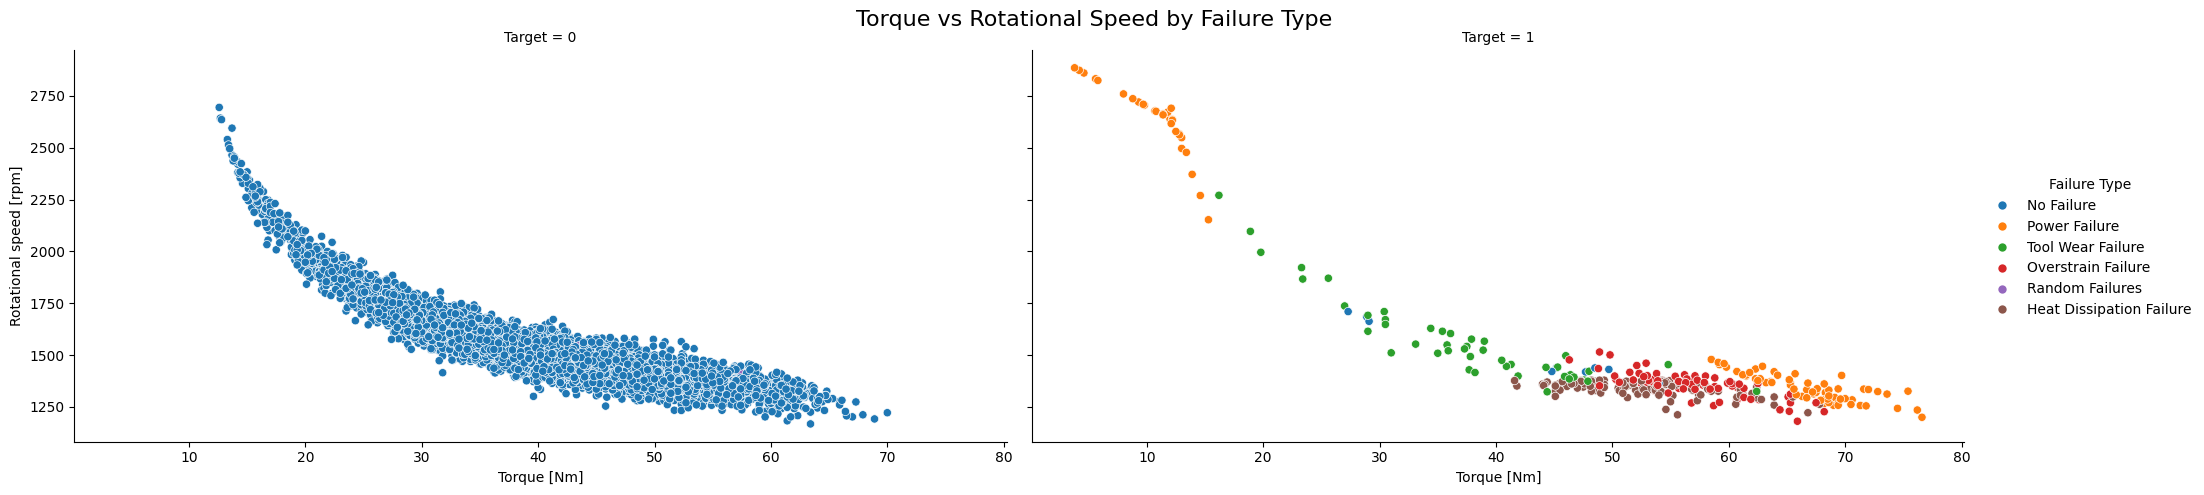

In [289]:
# Relplot with hue by 'Failure Type'
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", col="Target", palette='tab10', height=5, aspect=2)
plt.subplots_adjust(top=0.9)
plt.suptitle("Torque vs Rotational Speed by Failure Type", fontsize=16)
plt.show()

## Voilin & Bozxen Plots plot

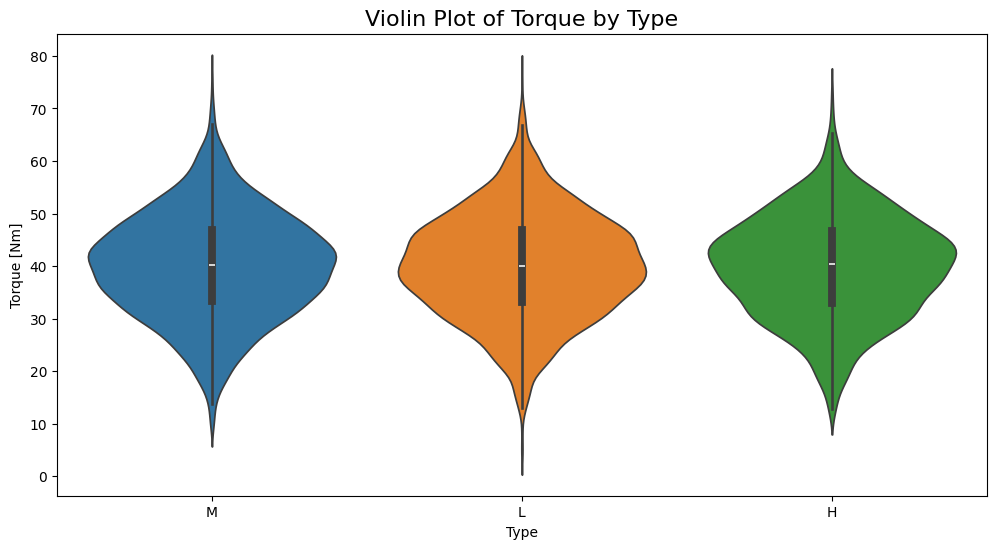

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.violinplot(x="Type", y="Torque [Nm]", hue="Type", data=df, palette="tab10", legend=False)
plt.title("Violin Plot of Torque by Type", fontsize=16)
plt.show()


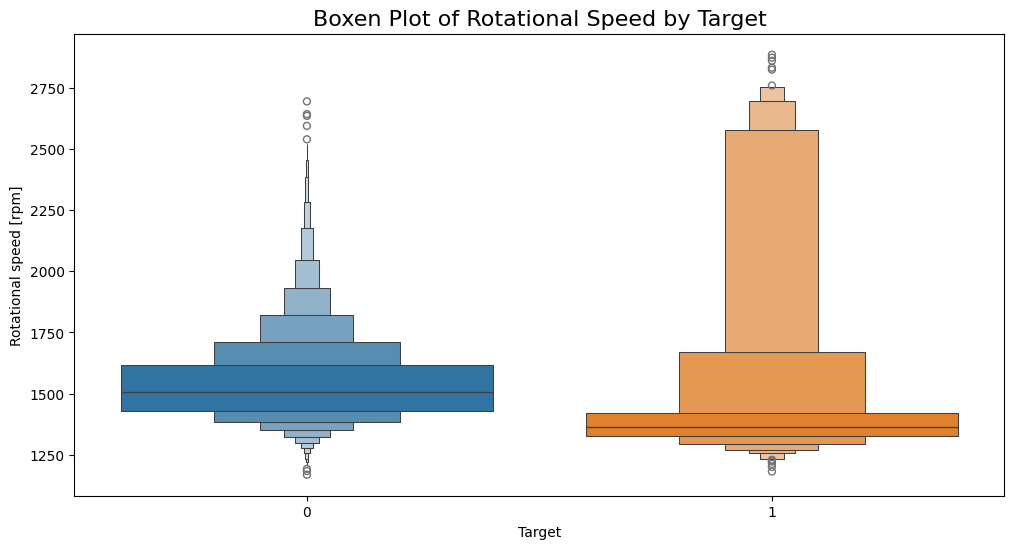

In [292]:


plt.figure(figsize=(12, 6))
sns.boxenplot(x="Target", y="Rotational speed [rpm]", hue="Target", data=df, palette="tab10", legend=False)
plt.title("Boxen Plot of Rotational Speed by Target", fontsize=16)
plt.show()


## FacetGrid 

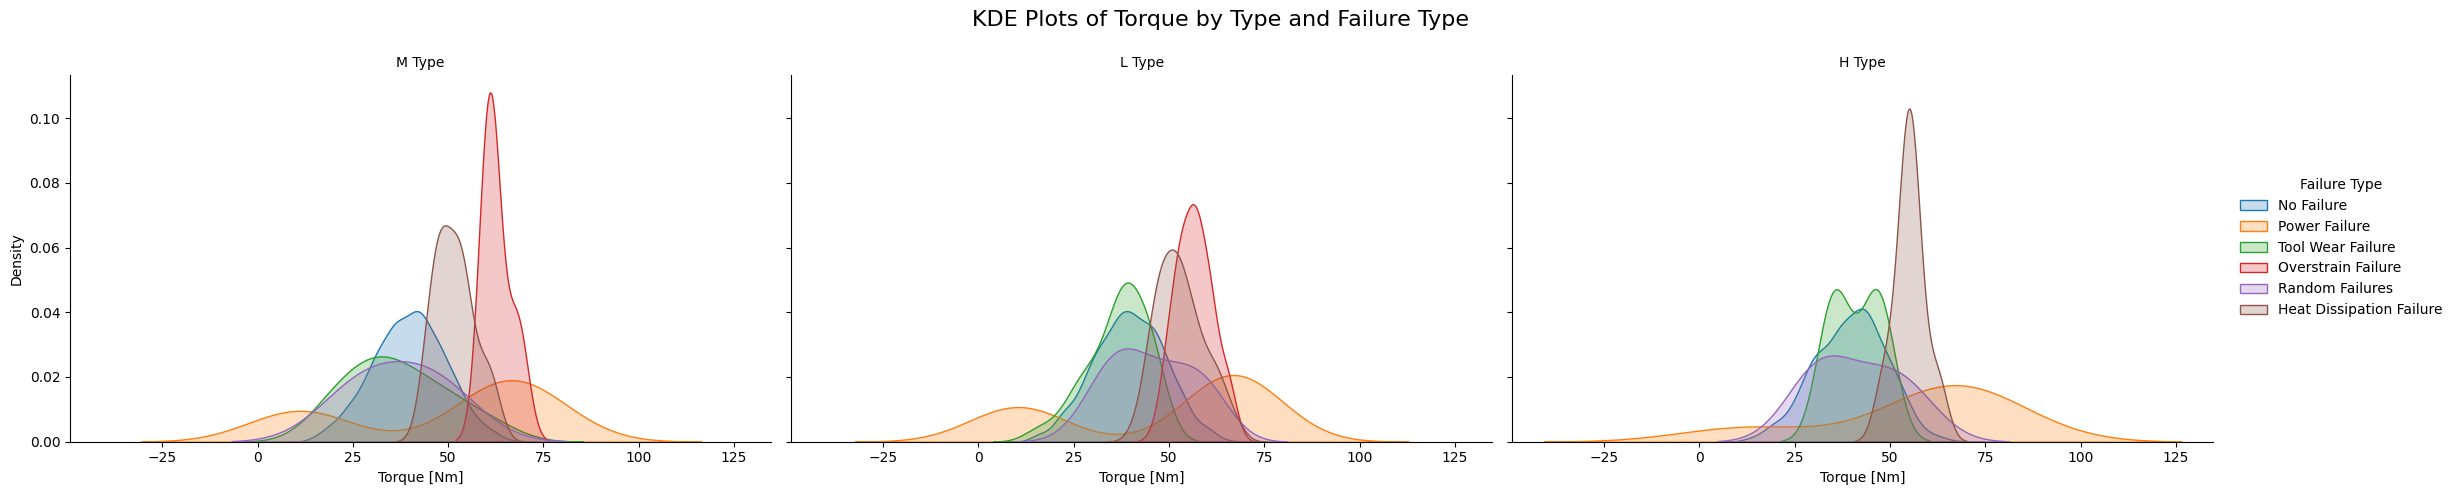

In [294]:
# FacetGrid to show different distributions of 'Torque' across 'Type'
# Filter out small groups (e.g., groups with < 2 values)
filtered_df = df.groupby(['Type', 'Failure Type']).filter(lambda x: x['Torque [Nm]'].nunique() > 1)

g = sns.FacetGrid(filtered_df, col="Type", hue="Failure Type", height=5, aspect=1.5)
g.map(sns.kdeplot, "Torque [Nm]", fill=True)
g.set_titles("{col_name} Type")
g.add_legend()
plt.suptitle("KDE Plots of Torque by Type and Failure Type", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()


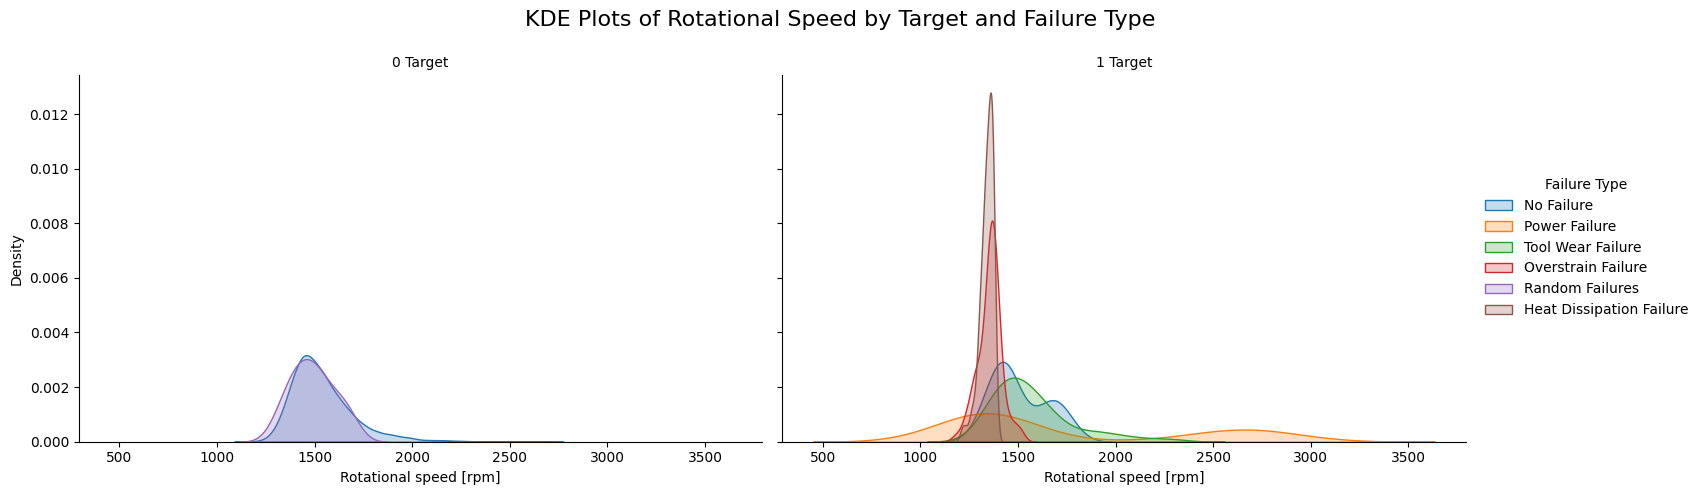

In [295]:
# FacetGrid to show different distributions of 'Rotational speed' across 'Target'
g = sns.FacetGrid(df, col="Target", hue="Failure Type", height=5, aspect=1.5)
g.map(sns.kdeplot, "Rotational speed [rpm]", fill=True)
g.set_titles("{col_name} Target")
g.add_legend()
plt.suptitle("KDE Plots of Rotational Speed by Target and Failure Type", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

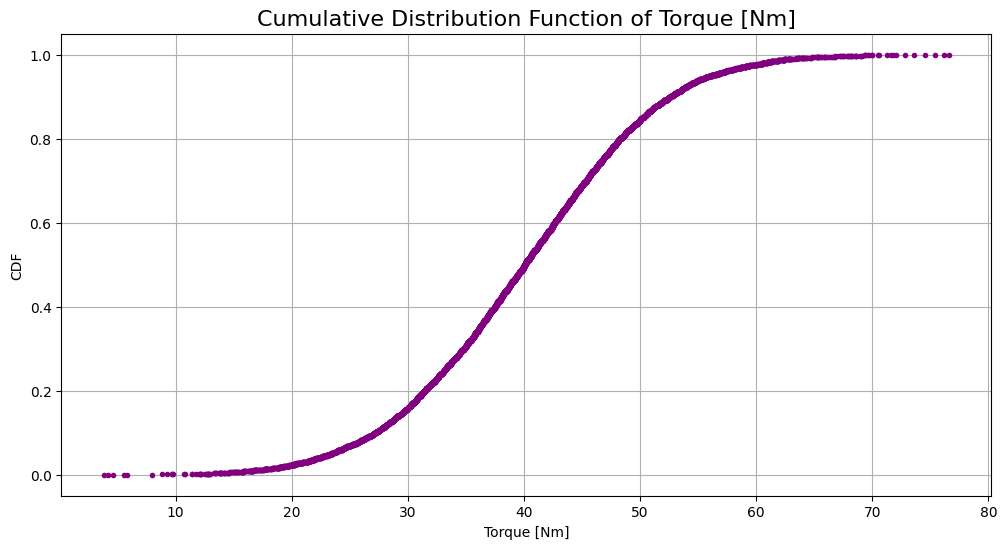

In [296]:
# CDF of Torque
plt.figure(figsize=(12, 6))
sorted_torque = np.sort(df['Torque [Nm]'].dropna())
cdf_torque = np.arange(1, len(sorted_torque) + 1) / len(sorted_torque)
plt.plot(sorted_torque, cdf_torque, marker='.', linestyle='none', color="purple")
plt.title("Cumulative Distribution Function of Torque [Nm]", fontsize=16)
plt.xlabel("Torque [Nm]")
plt.ylabel("CDF")
plt.grid(True)
plt.show()

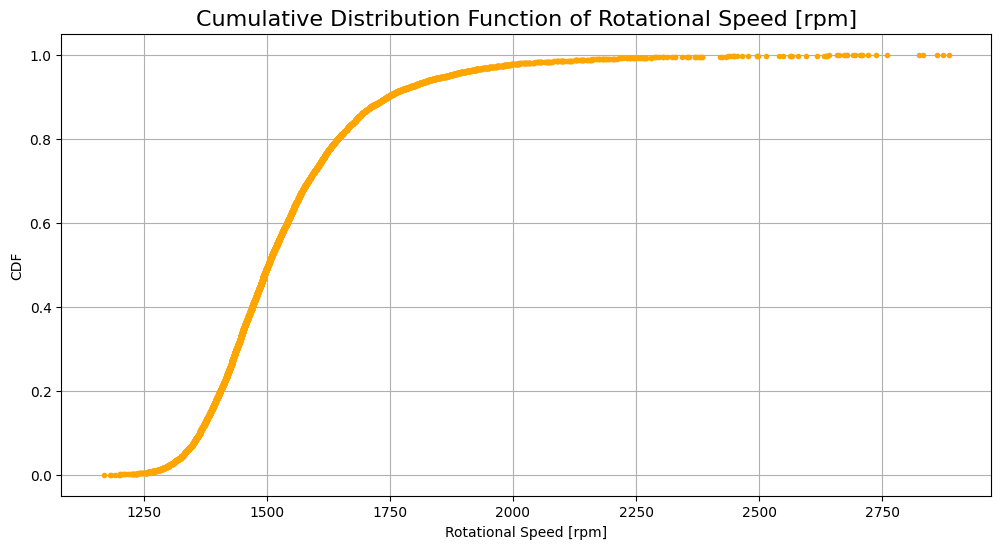

In [297]:
# CDF of Rotational speed
plt.figure(figsize=(12, 6))
sorted_speed = np.sort(df['Rotational speed [rpm]'].dropna())
cdf_speed = np.arange(1, len(sorted_speed) + 1) / len(sorted_speed)
plt.plot(sorted_speed, cdf_speed, marker='.', linestyle='none', color="orange")
plt.title("Cumulative Distribution Function of Rotational Speed [rpm]", fontsize=16)
plt.xlabel("Rotational Speed [rpm]")
plt.ylabel("CDF")
plt.grid(True)
plt.show()

## Histograms

In [299]:
def plot_hist(feature):
    """
    Plot histogram, KDE, mean, median, mode, and boxplot for the given feature.
    """
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    # KDE + Histogram
    sns.histplot(df[feature], kde=True, ax=ax[0], color='skyblue')
    
    # Add vertical lines for mean, median, mode
    ax[0].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[feature].mean():.2f}')
    ax[0].axvline(df[feature].median(), color='green', linestyle='-', linewidth=2, label=f'Median: {df[feature].median():.2f}')
    ax[0].axvline(statistics.mode(df[feature]), color='purple', linestyle='-.', linewidth=2, label=f'Mode: {statistics.mode(df[feature]):.2f}')
    ax[0].legend()
    ax[0].set_title(f"Distribution of {feature} (with Mean, Median, Mode)", fontsize=16)

    # Boxplot
    sns.boxplot(x=df[feature], ax=ax[1], color='lightcoral')
    ax[1].set_title(f"Boxplot of {feature}", fontsize=16)
    
    plt.tight_layout()
    plt.show()

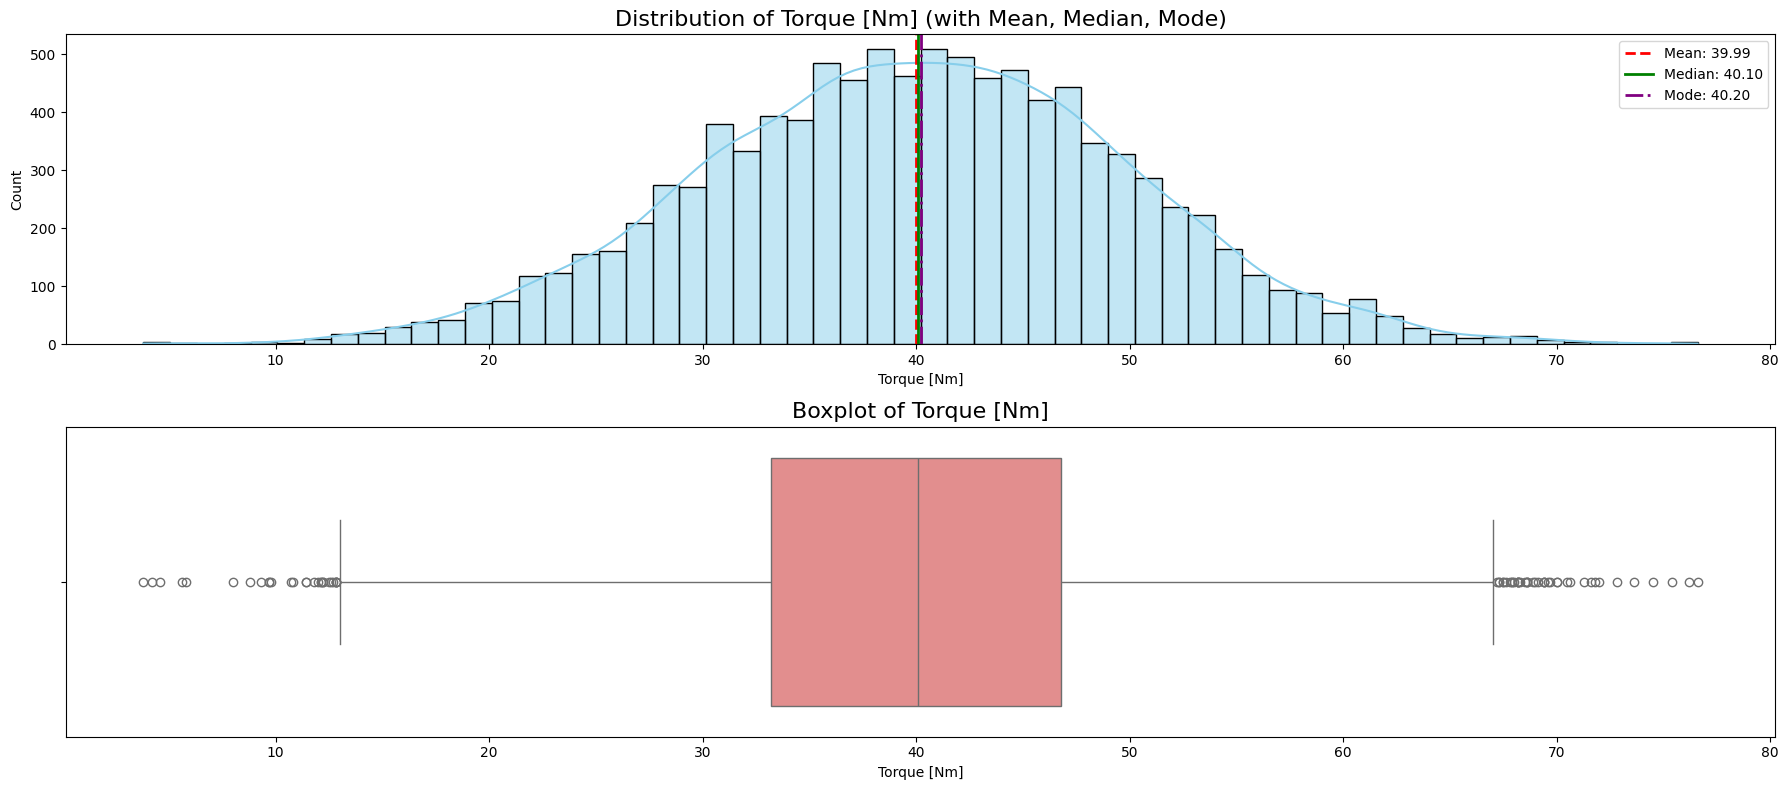

In [300]:
# Example for 'Torque [Nm]'
plot_hist('Torque [Nm]')

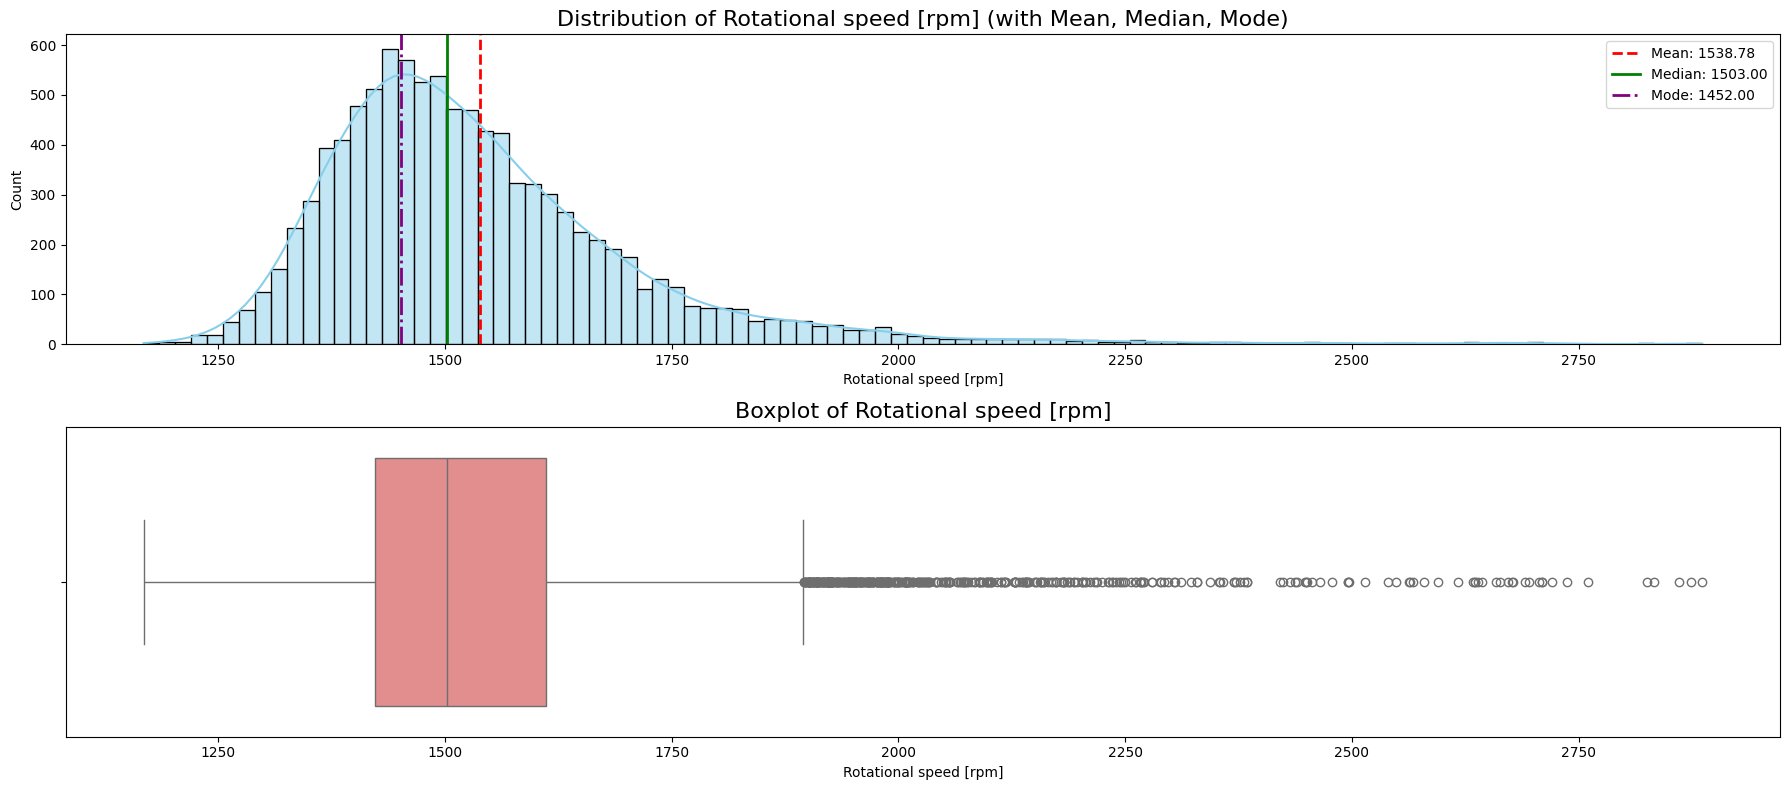

In [301]:
# Example for 'Rotational speed [rpm]'
plot_hist('Rotational speed [rpm]')

## KDEs

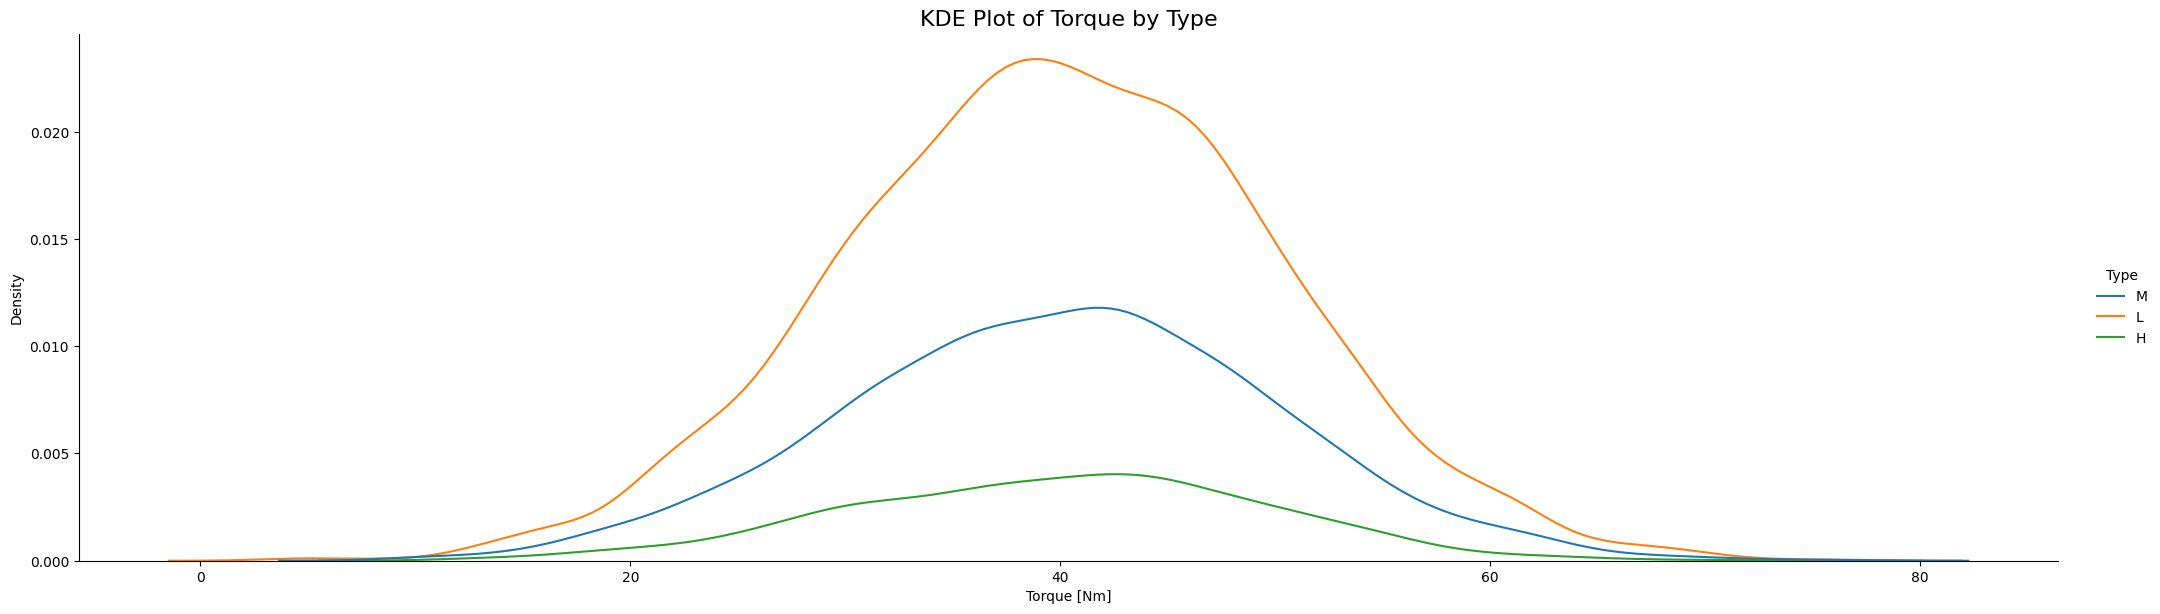

In [304]:
# KDE plots for 'Torque [Nm]' and 'Rotational speed [rpm]' by 'Type'
sns.displot(df, x="Torque [Nm]", hue="Type", kind="kde", height=6, aspect=3.5, palette="tab10")
plt.title("KDE Plot of Torque by Type", fontsize=16)
plt.show()

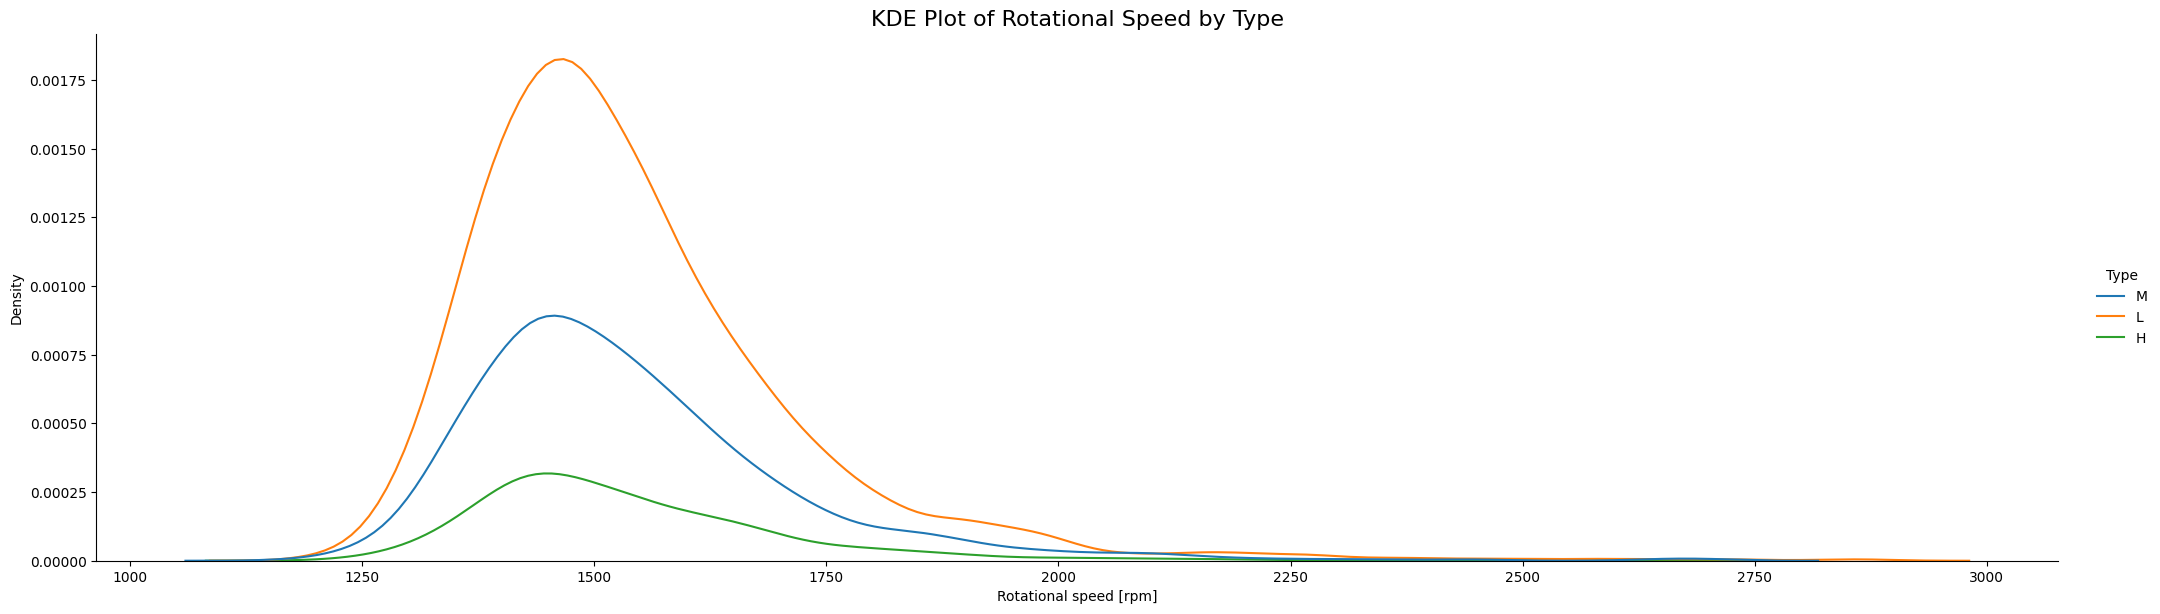

In [305]:
sns.displot(df, x="Rotational speed [rpm]", hue="Type", kind="kde", height=6, aspect=3.5, palette="tab10")
plt.title("KDE Plot of Rotational Speed by Type", fontsize=16)
plt.show()

## Jointplot 

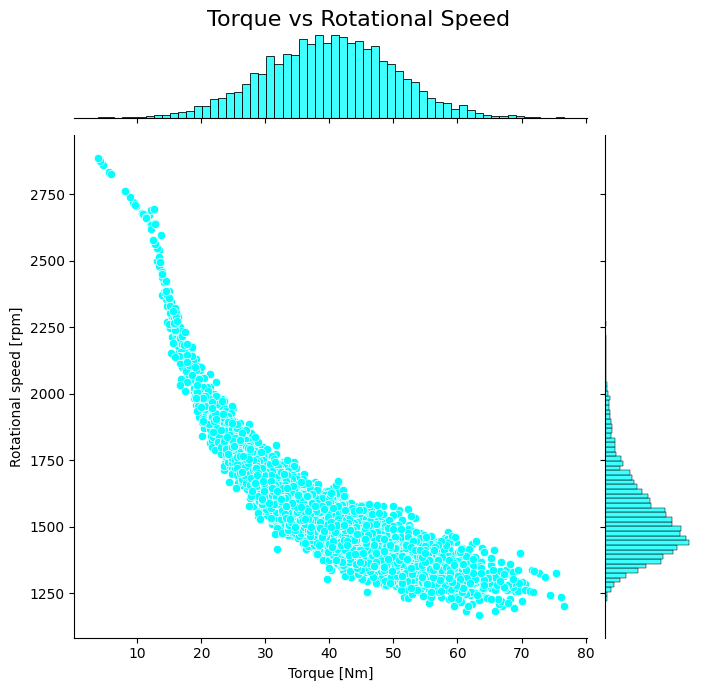

In [307]:
# Jointplot for 'Torque' vs 'Rotational speed' to visualize correlation
sns.jointplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", kind="scatter", color="cyan", height=7)
plt.suptitle("Torque vs Rotational Speed", fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

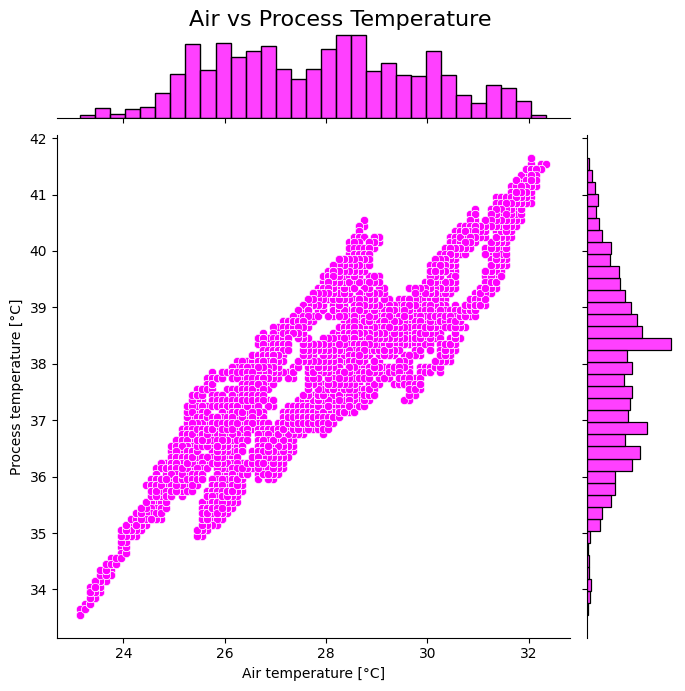

In [308]:
# Jointplot for 'Air temperature [°C]' vs 'Process temperature [°C]'
sns.jointplot(data=df, x="Air temperature [°C]", y="Process temperature [°C]", kind="scatter", color="magenta", height=7)
plt.suptitle("Air vs Process Temperature", fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

# Feature selection

In [310]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# Apply Ordinal Encoding to categorical features
encoder = ce.OrdinalEncoder(cols=['Type', 'Failure Type'])
df = encoder.fit_transform(df)

# Label encode the 'Failure Type' column as target variable
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

# Check the first few rows after encoding
df.head(2)

,Type,Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Air temperature [°C],Process temperature [°C],Temperature difference [°C]
0,1,1551,42.8,0,0,0,25.95,36.45,10.5
1,2,1408,46.3,3,0,0,26.05,36.55,10.5


In [311]:
# Split data into features (X) and target (y)
X = df.drop(columns="Failure Type", axis=1)
y = df["Failure Type"]

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

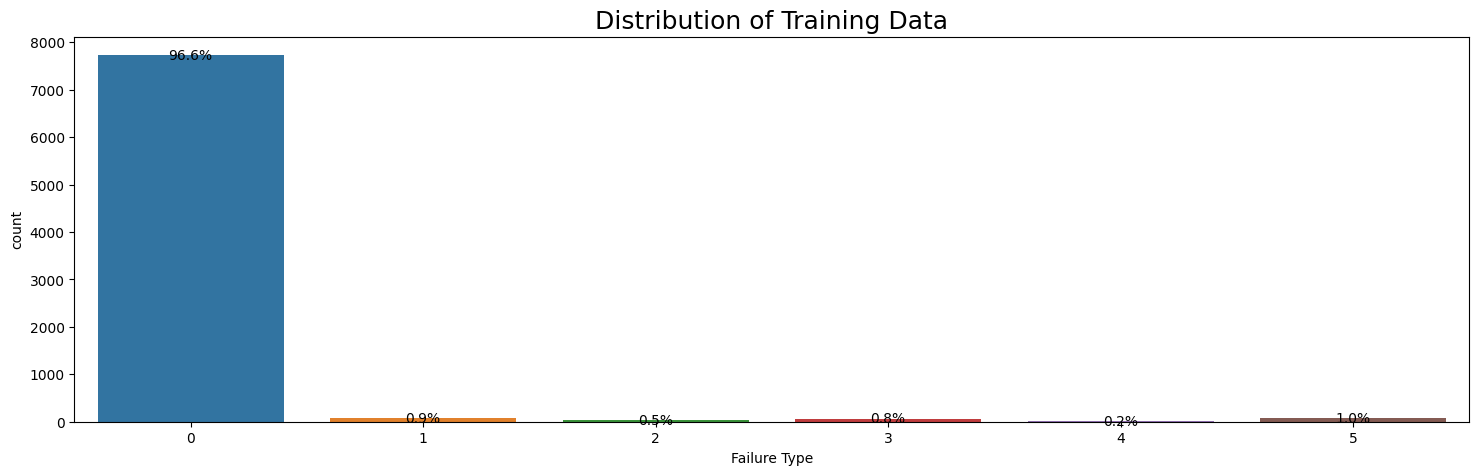

In [312]:
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=y_train, hue=y_train, palette='tab10', legend=False)
t = len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Distribution of Training Data', fontsize=18)
plt.show()



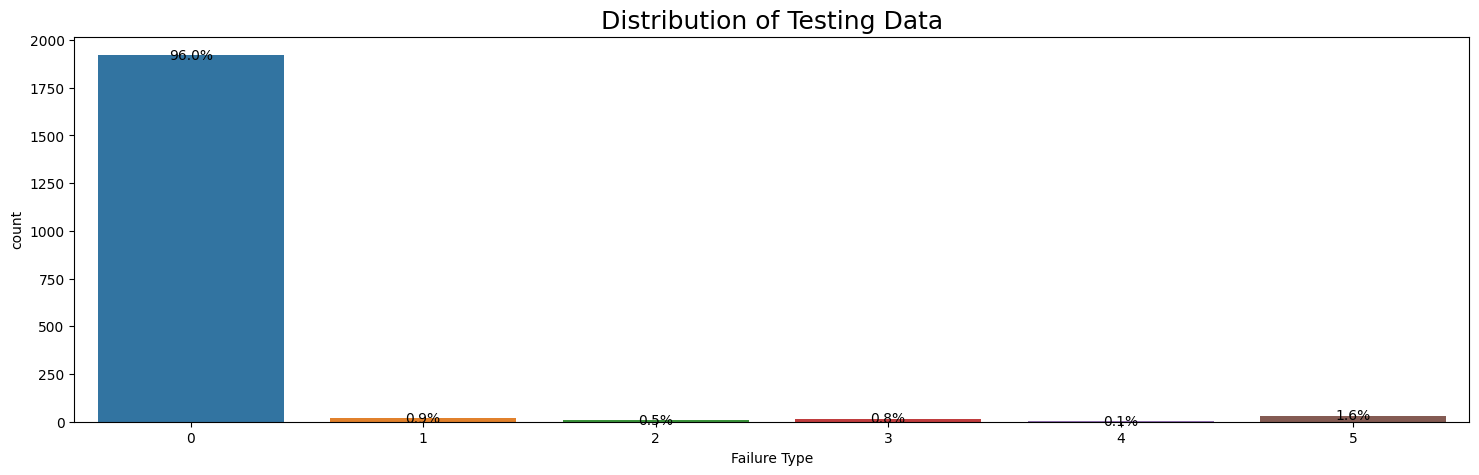

In [398]:
# Count plot for y_test distribution
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=y_test, hue=y_test, palette='tab10', legend=False)  # Added hue and legend=False
t = len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Distribution of Testing Data', fontsize=18)
plt.show()

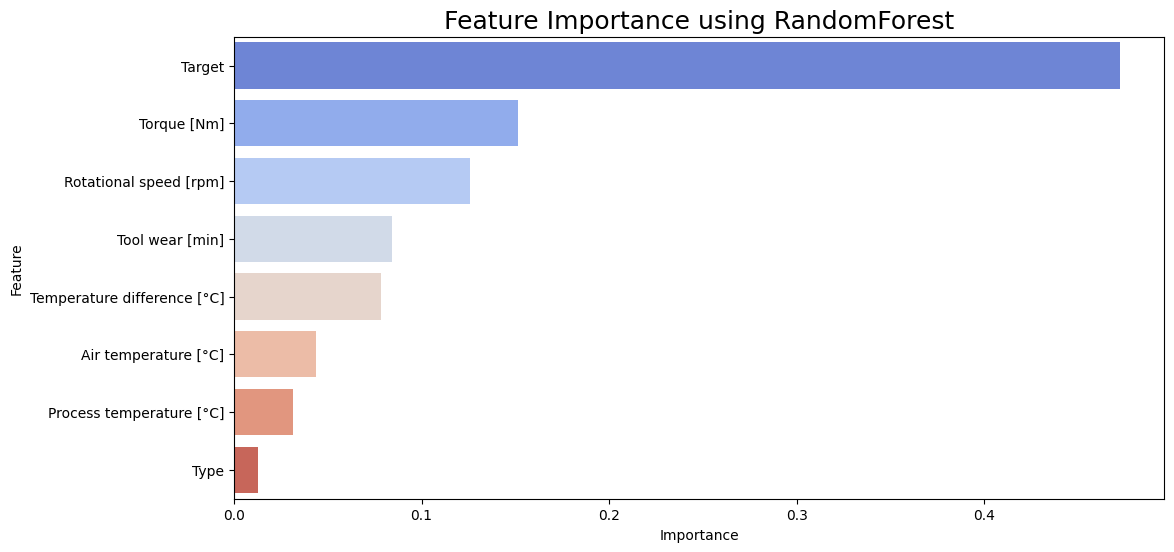

In [314]:


# Initialize and train a RandomForestClassifier
rf = RandomForestClassifier(random_state=21)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a dataframe with features and their importance
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features based on importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_df, palette='coolwarm', legend=False)
plt.title('Feature Importance using RandomForest', fontsize=18)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create pipeline
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        solver='saga',
        max_iter=5000,
        penalty='l2',
        random_state=21,
        class_weight='balanced'
    )
)

# Initialize RFE with custom importance getter
selector = RFE(
    estimator=pipe,
    n_features_to_select=min(5, X_train.shape[1]),
    step=1,
    importance_getter='named_steps.logisticregression.coef_'
)

# Fit RFE
selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]
print(f"Selected features: {list(selected_features)}")

# Create ranking DataFrame
rfe_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': selector.ranking_})
rfe_df = rfe_df.sort_values(by='Ranking')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Ranking',
    y='Feature',
    data=rfe_df,
    hue='Feature',
    palette='viridis',
    legend=False
)
plt.title(f'RFE Feature Ranking (Selected {len(selected_features)} features)', fontsize=16)
plt.xlabel('Ranking (1 = selected)')
plt.ylabel('Feature Name')
plt.show()

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.90      0.95      0.92        19
           2       1.00      0.78      0.88         9
           3       0.88      0.94      0.91        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           1.00      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.99      1.00      1.00      2000



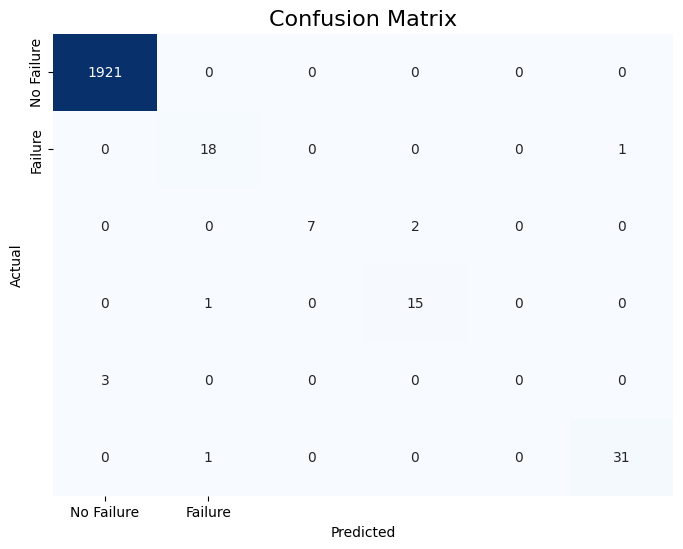

In [316]:
from sklearn.metrics import classification_report, confusion_matrix

# Initialize RandomForestClassifier (can use other models like Logistic Regression, SVM, etc.)
model = RandomForestClassifier(random_state=21)

# Train the model on the selected features
model.fit(X_train[selected_features], y_train)

# Predictions on the test set
y_pred = model.predict(X_test[selected_features])

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [317]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

Optimized Logistic Regression:
Training Accuracy    : 60.66 %
Test Accuracy Score  : 61.3 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75      1921
           1       0.95      1.00      0.97        19
           2       0.89      0.89      0.89         9
           3       0.94      1.00      0.97        16
           4       0.00      0.67      0.01         3
           5       1.00      0.97      0.98        32

    accuracy                           0.61      2000
   macro avg       0.80      0.85      0.76      2000
weighted avg       1.00      0.61      0.76      2000

--------------------------------------------------------


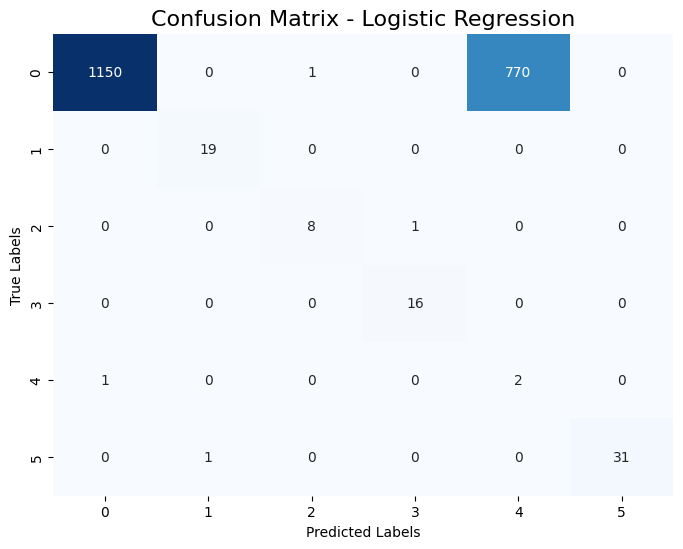

In [400]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress convergence warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

# Best practice pipeline with proper scaling and optimized parameters
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        solver='saga',        # Most robust solver
        max_iter=10000,       # Substantially increased iterations
        penalty='l2',         # Regularization
        C=1.0,               # Default regularization strength
        random_state=42,
        class_weight='balanced'  # Handles class imbalance if present
    )
)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred_lr = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate metrics
log_train = round(accuracy_score(y_train, y_pred_train) * 100, 2)
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)

# Print results
print("Optimized Logistic Regression:")
print("Training Accuracy    :", log_train, "%")
print("Test Accuracy Score  :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_lr, zero_division=0))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
           cbar=False, 
           xticklabels=model.classes_, 
           yticklabels=model.classes_)
plt.title('Confusion Matrix - Logistic Regression', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Decision Tree:
Training Accuracy    : 100.0 %
Model Accuracy Score : 99.3 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.81      0.89      0.85        19
           2       0.82      1.00      0.90         9
           3       0.92      0.69      0.79        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           0.99      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------


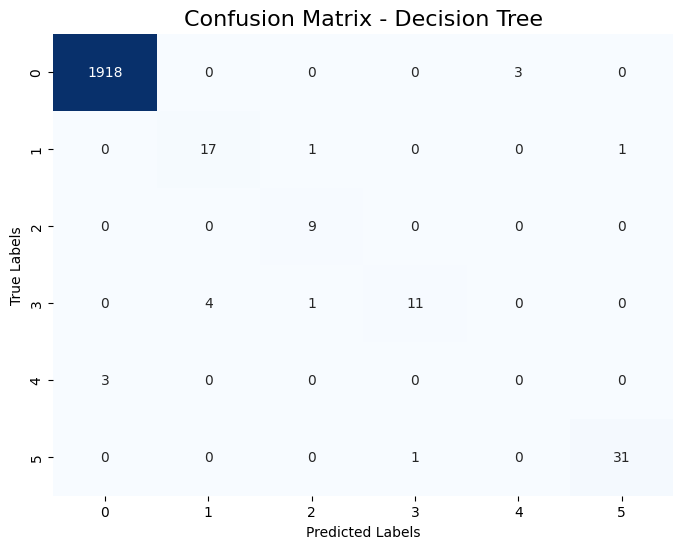

In [388]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dec = decision_tree.predict(X_test)

# Calculate Accuracy
decision_train = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("Decision Tree:")
print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_dec)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.title('Confusion Matrix - Decision Tree', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Random Forest:
Training Accuracy    : 100.0 %
Model Accuracy Score : 99.55 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.90      0.95      0.92        19
           2       1.00      0.67      0.80         9
           3       0.83      0.94      0.88        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           1.00      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.99      1.00      0.99      2000

--------------------------------------------------------


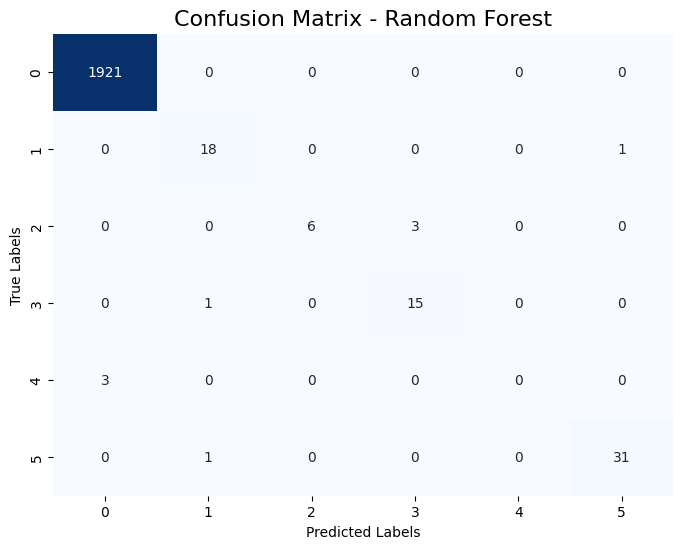

In [320]:

import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Calculate Accuracy
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("Random Forest:")
print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=random_forest.classes_, yticklabels=random_forest.classes_)
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Support Vector Machine:
Training Accuracy    : 96.64 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


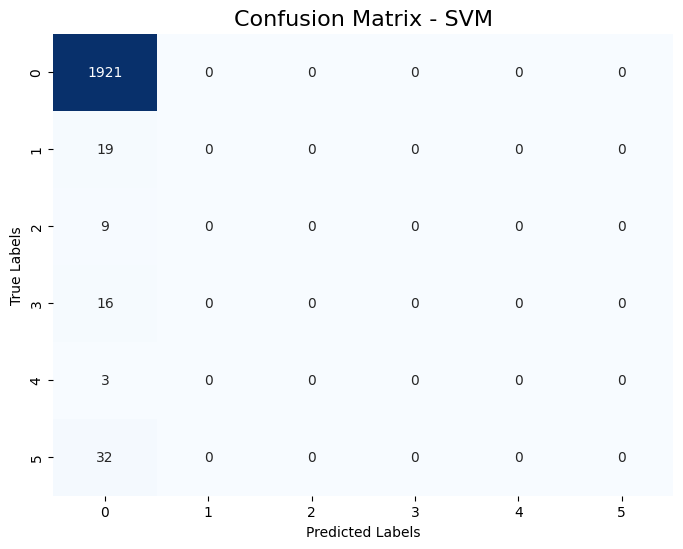

In [321]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

# Initialize SVM model
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Calculate Accuracy
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("Support Vector Machine:")
print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title('Confusion Matrix - SVM', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

K-Nearest Neighbors:
Training Accuracy    : 97.31 %
Model Accuracy Score : 96.5 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1921
           1       0.78      0.37      0.50        19
           2       0.00      0.00      0.00         9
           3       0.75      0.38      0.50        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.42      0.29      0.33      2000
weighted avg       0.94      0.96      0.95      2000

--------------------------------------------------------


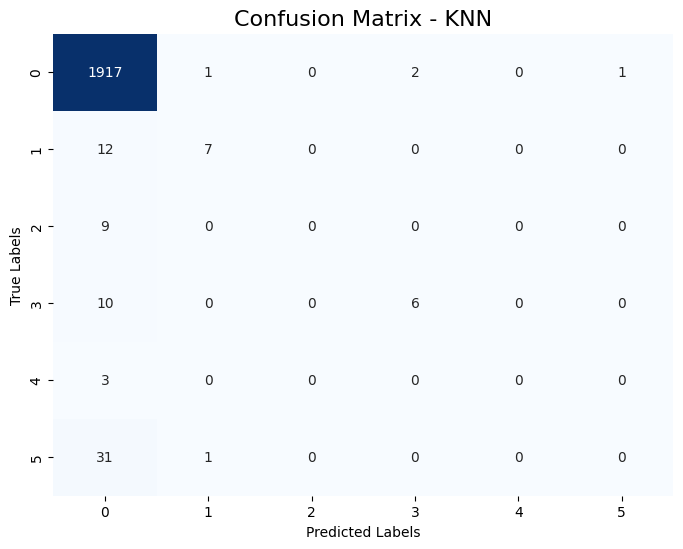

In [322]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate Accuracy
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("K-Nearest Neighbors:")
print("Training Accuracy    :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix - KNN', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

XGBoost:
Training Accuracy    : 100.0 %
Model Accuracy Score : 99.55 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.90      0.95      0.92        19
           2       1.00      0.78      0.88         9
           3       0.93      0.88      0.90        16
           4       0.00      0.00      0.00         3
           5       0.97      1.00      0.98        32

    accuracy                           1.00      2000
   macro avg       0.80      0.77      0.78      2000
weighted avg       0.99      1.00      0.99      2000

--------------------------------------------------------


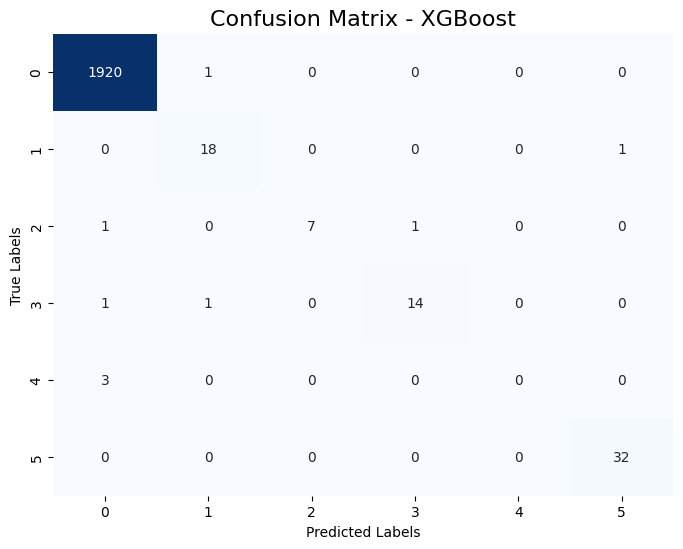

In [323]:
import xgboost as xgb
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names by replacing special characters (if any)
X_train.columns = X_train.columns.str.replace(r'[^A-Za-z0-9_]+', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^A-Za-z0-9_]+', '', regex=True)

# Convert the data to DMatrix format (which is required by XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Accuracy
xgb_train = round(xgb_model.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

# Print Accuracy and Classification Report
print("XGBoost:")
print("Training Accuracy    :", xgb_train, "%")
print("Model Accuracy Score :", xgb_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - XGBoost', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()